#Importação das bibliotecas

In [1]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

# Download do histórico de negociação do ticket/ação

In [2]:
symbol = 'VALE'
start_date = '2018-01-01'
end_date = '2025-06-30'

df = yf.download(symbol, start=start_date, end=end_date)



/tmp/ipython-input-2-1106458787.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


# Transformação do Dataframe

In [3]:
df

Price,Close,High,Low,Open,Volume
Ticker,VALE,VALE,VALE,VALE,VALE
Date,,,,,
2018-01-02,7.472507,7.490062,7.320365,7.343772,19189400
2018-01-03,7.519320,7.531022,7.419842,7.490061,20449600
2018-01-04,7.507616,7.659758,7.501764,7.624648,22033100
2018-01-05,7.659758,7.659758,7.449100,7.490061,20042800
2018-01-08,7.794344,7.794344,7.712422,7.759235,17507000
...,...,...,...,...,...
2025-06-23,9.180000,9.190000,9.010000,9.050000,38963300
2025-06-24,9.210000,9.210000,9.120000,9.180000,34861500


In [4]:
# Para "achatar" o MultiIndex das colunas:
df.columns = ['_'.join(col) for col in df.columns.values]

In [5]:
#Renomear colunas removendo o prefixo _VALE
df.columns = df.columns.str.replace('_VALE', '', regex=False)

In [6]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,7.472507,7.490062,7.320365,7.343772,19189400
2018-01-03,7.519320,7.531022,7.419842,7.490061,20449600
2018-01-04,7.507616,7.659758,7.501764,7.624648,22033100
2018-01-05,7.659758,7.659758,7.449100,7.490061,20042800
2018-01-08,7.794344,7.794344,7.712422,7.759235,17507000


# Verificação de valores ausentes

In [7]:
df.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


# Estatísticas descritivas

In [8]:
df.describe()

,Close,High,Low,Open,Volume
count,1882.000000,1882.000000,1882.000000,1882.000000,1.882000e+03
mean,10.023573,10.149255,9.897947,10.027826,2.791572e+07
std,2.512435,2.532065,2.486528,2.509999,1.322241e+07
min,4.113219,4.363263,4.056959,4.181981,5.251400e+06
25%,7.911297,8.002651,7.789492,7.910013,1.917905e+07
50%,9.924354,10.047533,9.801491,9.928966,2.554560e+07
75%,11.675121,11.829066,11.568955,11.721237,3.268640e+07
max,16.303818,16.349896,16.157906,16.196304,1.574684e+08


# Verificar registros duplicados

In [9]:
df.duplicated().sum()

np.int64(0)

# Análise temporal

Visualização dos preços ao longo do tempo



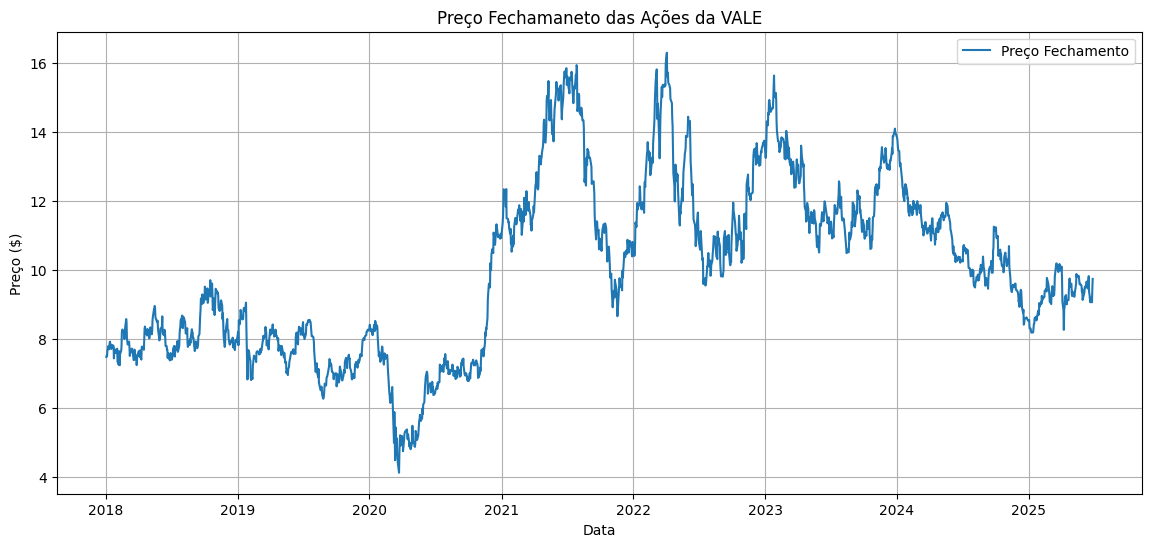

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Preço Fechamento')
plt.title('Preço Fechamaneto das Ações da VALE')
plt.xlabel('Data')
plt.ylabel('Preço ($)')
plt.legend()
plt.grid(True)
plt.show()


# Gráfico com média móvel

**Média Móvel de 20 períodos (MM20):** mostra a tendência de curto prazo. Calcula a média dos últimos 20 dias de negociação.

**Média Móvel de 50 períodos (MM50):** representa uma visão de médio prazo. Calcula a média dos últimos 50 dias.

A média móvel é um recurso muito utilizado pelos traders

Quando a MM20 cruza acima da MM50, pode indicar uma possível tendência de alta.
Quando a MM20 cruza abaixo da MM50, pode indicar uma possível tendência de baixa.

<Axes: title={'center': 'Média Móvel 20 e 50 dias'}, xlabel='Date'>

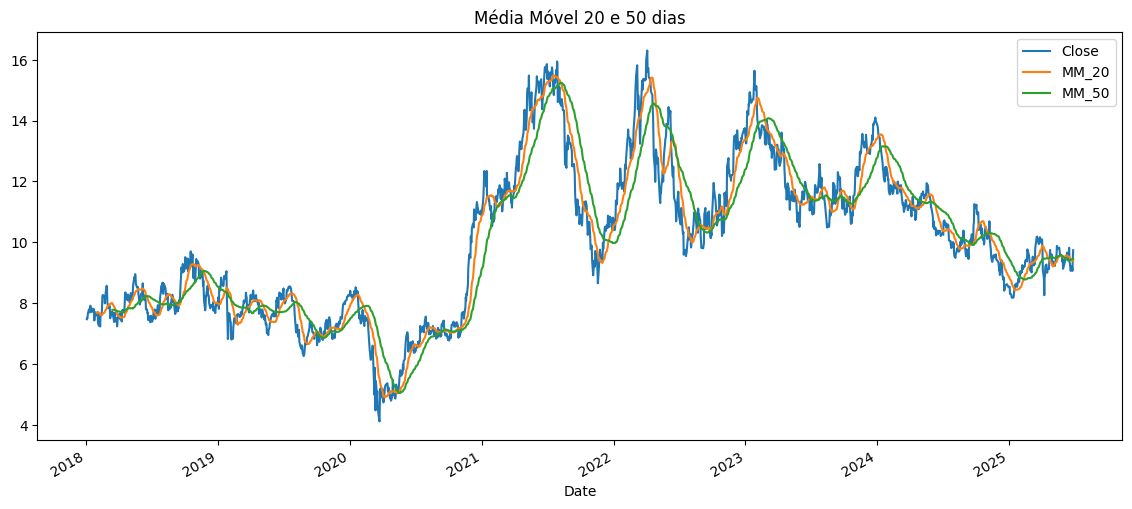

In [11]:
df['MM_20'] = df['Close'].rolling(window=20).mean()
df['MM_50'] = df['Close'].rolling(window=50).mean()

df[['Close', 'MM_20', 'MM_50']].plot(figsize=(14, 6), title='Média Móvel 20 e 50 dias')

# Gráfico do volume de negociações

<Axes: title={'center': 'Volume de Negociação'}, xlabel='Date'>

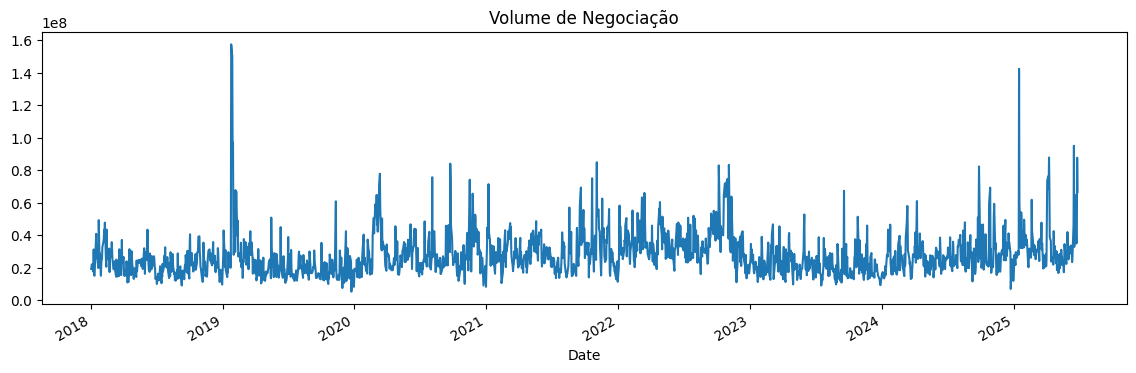

In [12]:
df['Volume'].plot(figsize=(14, 4), title='Volume de Negociação')

# Gráfico dos retornos diários

O Retorno Diário representa a variação percentual do preço de fechamento da ação de um dia para o outro.
Ele mostra o quanto o preço da ação subiu ou caiu em relação ao dia anterior.

Para traders, análise é importante para:

- auxilia no entendimento da volatilidade (quanto a ação oscila).
- utilizada para calcular métricas como desvio padrão (risco) e retorno acumulado.
- auxilia na identificar dias com movimentações fora do padrão.


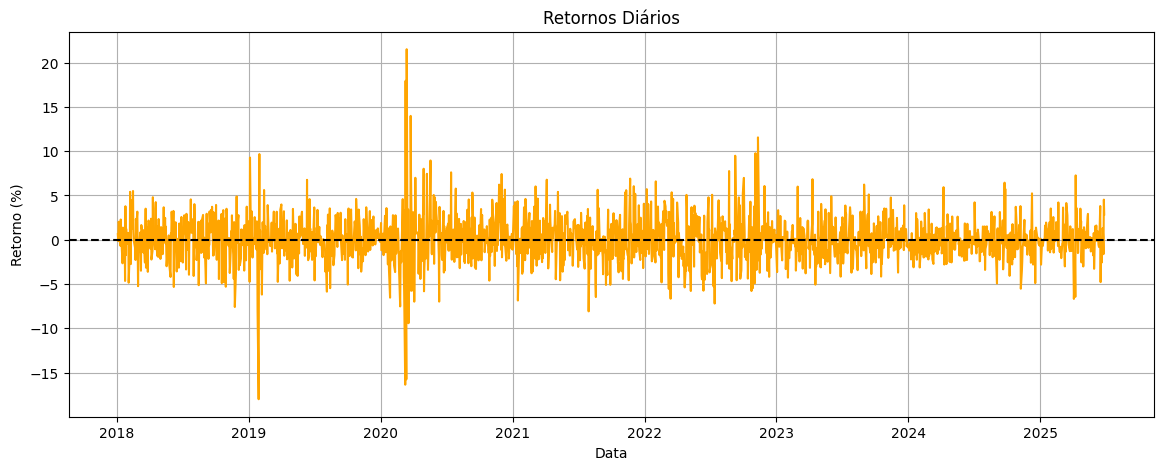

In [13]:
# Calculando retornos diários
df['Retorno_Diario'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14, 5))
plt.plot(df['Retorno_Diario'], label='Retorno Diário', color='orange')
plt.title('Retornos Diários')
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.show()

Histograma dos retornos

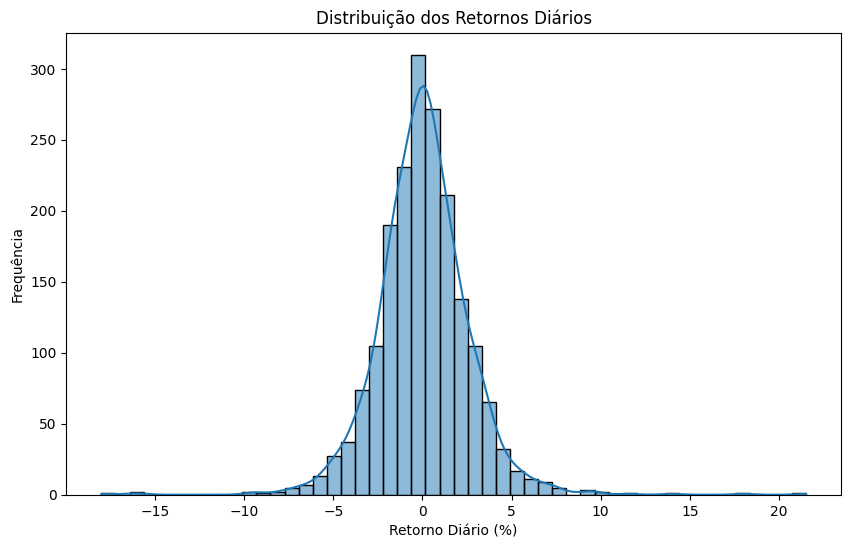

In [14]:
# Histograma dos retornos
plt.figure(figsize=(10, 6))
sns.histplot(df['Retorno_Diario'].dropna(), bins=50, kde=True)
plt.title('Distribuição dos Retornos Diários')
plt.xlabel('Retorno Diário (%)')
plt.ylabel('Frequência')
plt.show()

# Análise de Volume de Negociações

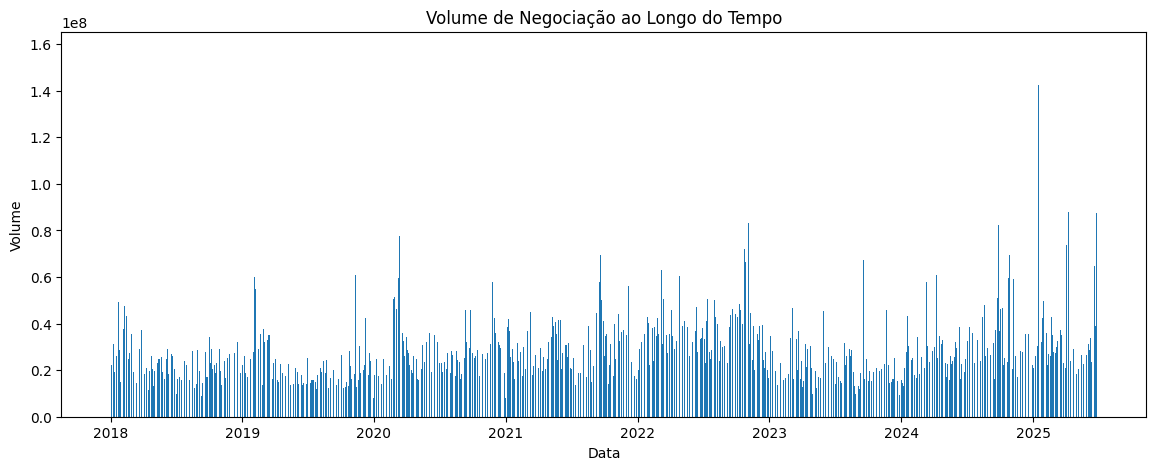

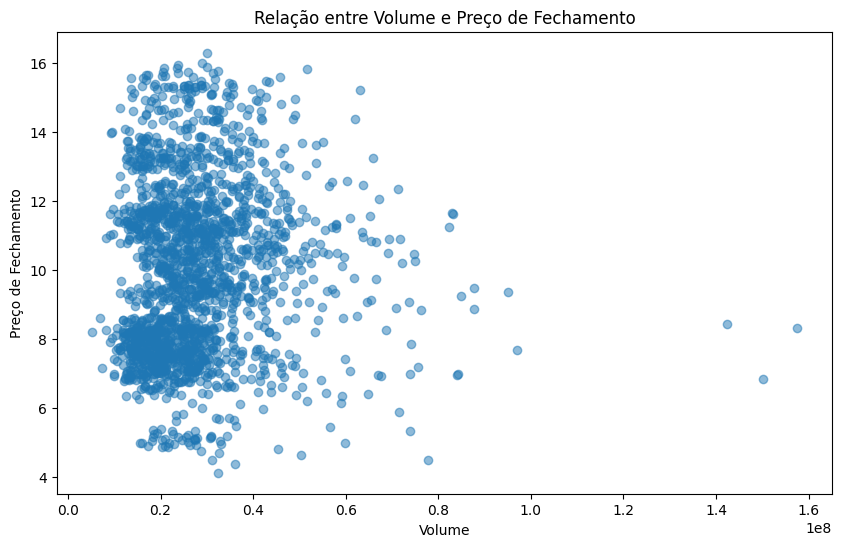

In [15]:
plt.figure(figsize=(14, 5))
plt.bar(df.index, df['Volume'], label='Volume de Negociação')
plt.title('Volume de Negociação ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Volume')
plt.show()

# Relação entre volume e preço
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Relação entre Volume e Preço de Fechamento')
plt.xlabel('Volume')
plt.ylabel('Preço de Fechamento')
plt.show()

# Análise Sazonal e de Tendência

<Figure size 1400x1000 with 0 Axes>

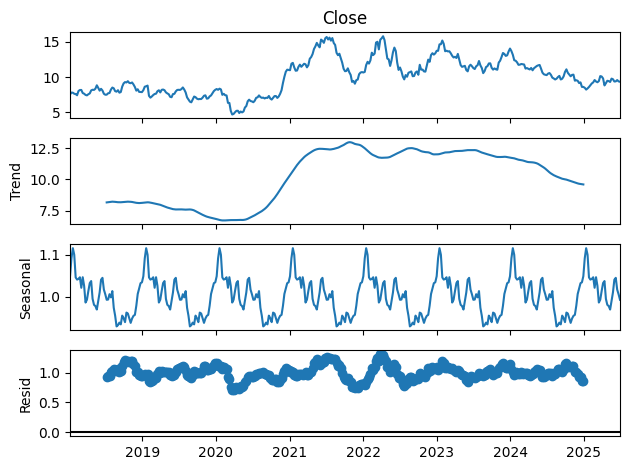

In [16]:
# Decomposição temporal (usando dados semanais para melhor visualização)
weekly = df['Close'].resample('W').mean()
result = seasonal_decompose(weekly, model='multiplicative', period=52)

plt.figure(figsize=(14, 10))
result.plot()
plt.show()

# Análise de Extremos

In [17]:
# Identificando máximos e mínimos
max_close = df['Close'].max()
min_close = df['Close'].min()

print(f"Preço máximo no período: ${max_close:.2f} em {df['Close'].idxmax().strftime('%Y-%m-%d')}")
print(f"Preço mínimo no período: ${min_close:.2f} em {df['Close'].idxmin().strftime('%Y-%m-%d')}")


Preço máximo no período: $16.30 em 2022-04-04
Preço mínimo no período: $4.11 em 2020-03-23


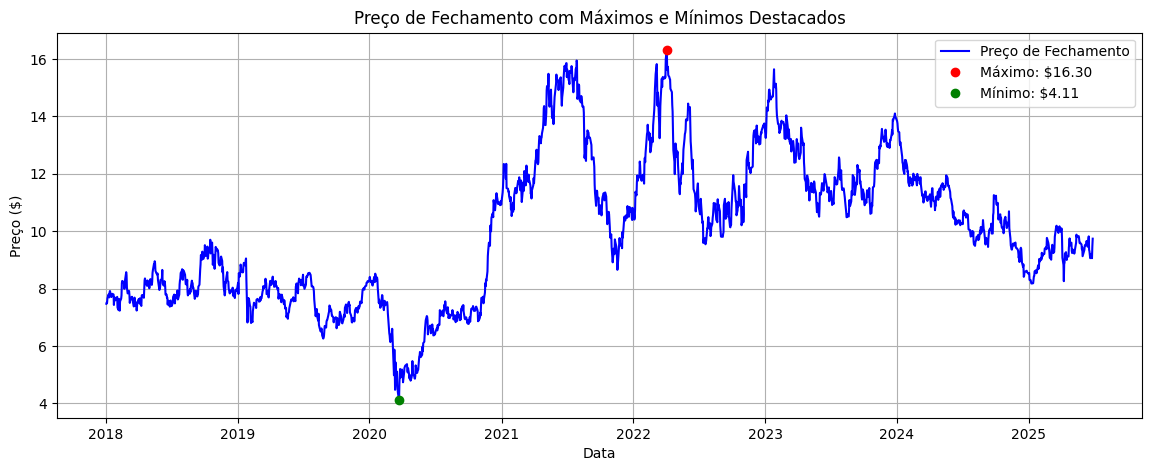

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(df['Close'], label='Preço de Fechamento', color='blue')

# Máximo
max_date = df['Close'].idxmax()
plt.plot(max_date, max_close, 'ro', label=f'Máximo: ${max_close:.2f}')

# Mínimo
min_date = df['Close'].idxmin()
plt.plot(min_date, min_close, 'go', label=f'Mínimo: ${min_close:.2f}')

plt.title('Preço de Fechamento com Máximos e Mínimos Destacados')
plt.xlabel('Data')
plt.ylabel('Preço ($)')
plt.legend()
plt.grid(True)
plt.show()


#Análise da Volatilidade - Intraday

In [19]:
# Dias com maior variação
df['Daily_Change'] = df['High'] - df['Low']
top_volatile_days = df.nlargest(10, 'Daily_Change')[['High', 'Low', 'Daily_Change']]
print("\nDias com maior variação:")
print(top_volatile_days)


Dias com maior variação:
                 High        Low  Daily_Change
Date                                          
2019-01-25   9.409511   7.826034      1.583477
2020-03-13   5.782262   4.832096      0.950166
2022-02-25  13.746508  12.840313      0.906195
2022-11-11  12.541425  11.661183      0.880242
2025-04-09   8.920000   8.060000      0.860000
2025-04-08   9.010000   8.170000      0.840000
2020-03-11   5.919785   5.107143      0.812642
2022-04-22  13.562198  12.755839      0.806359
2021-07-30  15.374443  14.575138      0.799305
2018-10-29   9.385150   8.587321      0.797829


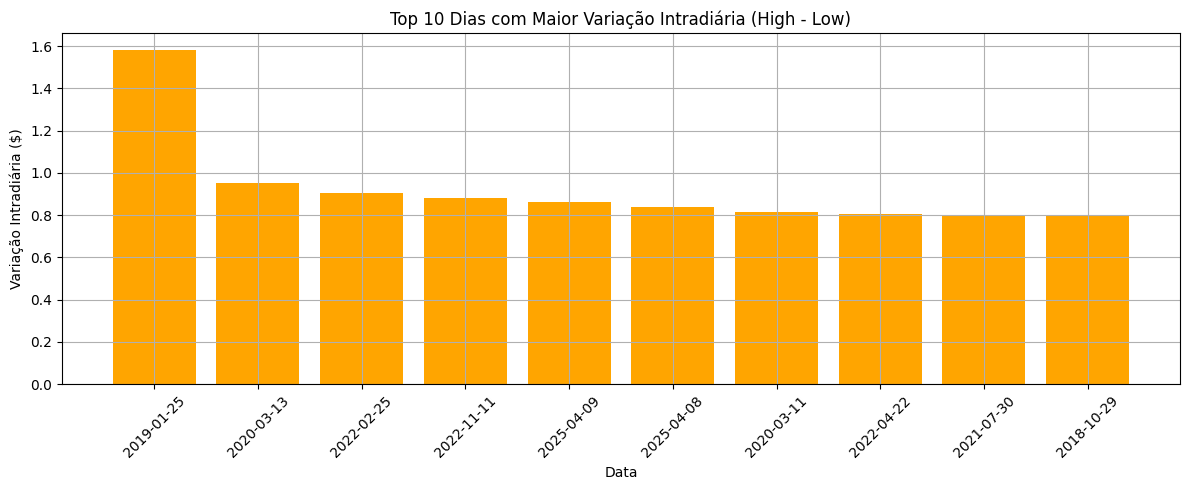

In [20]:
top_volatile_days_plot = df.loc[top_volatile_days.index]

plt.figure(figsize=(12, 5))
plt.bar(top_volatile_days_plot.index.strftime('%Y-%m-%d'),
        top_volatile_days_plot['Daily_Change'],
        color='orange')

plt.title('Top 10 Dias com Maior Variação Intradiária (High - Low)')
plt.xlabel('Data')
plt.ylabel('Variação Intradiária ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Agregando por ano
annual = df.resample('Y').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

print("\nDesempenho Anual:")
print(annual)

# Retorno anualizado
annual_return = (annual['Close'].pct_change() * 100).dropna()
print("\nRetorno Anual (%):")
print(annual_return)


Desempenho Anual:
                 Open       High        Low      Close      Volume
Date                                                              
2018-12-31   7.343772   9.823649   7.059760   8.033104  5612111500
2019-12-31   7.880845   9.409511   6.212104   8.251443  5882995400
2020-12-31   8.320206  11.381744   4.056959  10.925432  7506137400
2021-12-31  11.407822  16.111193   8.570448  10.766817  7691216300
2022-12-31  10.820576  16.349896   9.369127  13.751762  9183536600
2023-12-31  13.492448  15.647998  10.365917  13.967704  5459896900
2024-12-31  13.985318  14.082193   8.362588   8.535807  6957233000
2025-12-31   8.468444  10.220000   8.060000   9.740000  4244249600

Retorno Anual (%):
Date
2019-12-31     2.717990
2020-12-31    32.406324
2021-12-31    -1.451797
2022-12-31    27.723563
2023-12-31     1.570282
2024-12-31   -38.888977
2025-12-31    14.107549
Freq: YE-DEC, Name: Close, dtype: float64


/tmp/ipython-input-21-2231675962.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual = df.resample('Y').agg({


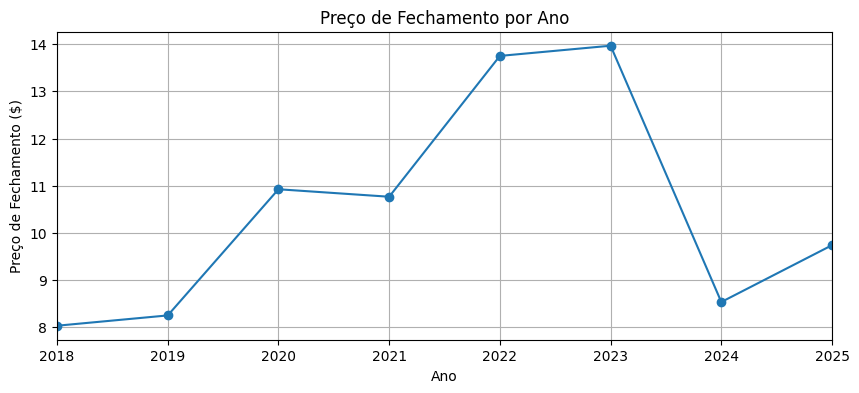

In [22]:
annual['Close'].plot(marker='o', figsize=(10, 4), title='Preço de Fechamento por Ano')
plt.ylabel('Preço de Fechamento ($)')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

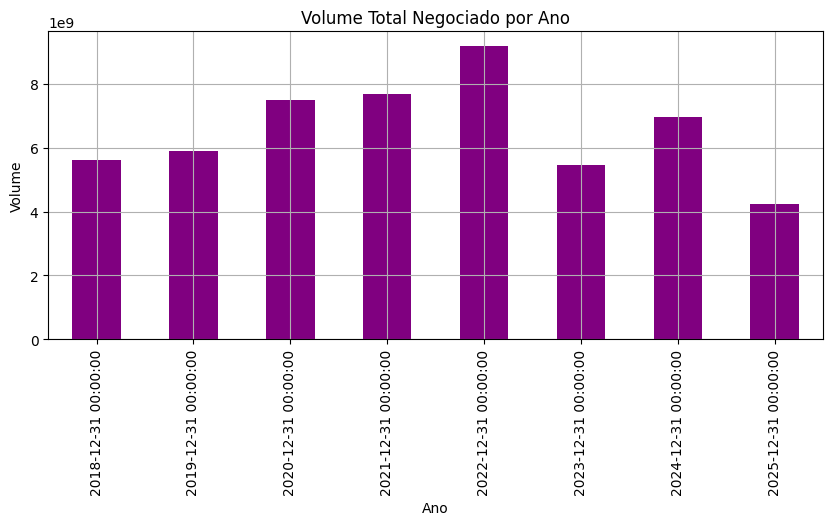

In [23]:
annual['Volume'].plot(kind='bar', color='purple', figsize=(10, 4), title='Volume Total Negociado por Ano')
plt.ylabel('Volume')
plt.xlabel('Ano')
plt.grid(True)
plt.show()

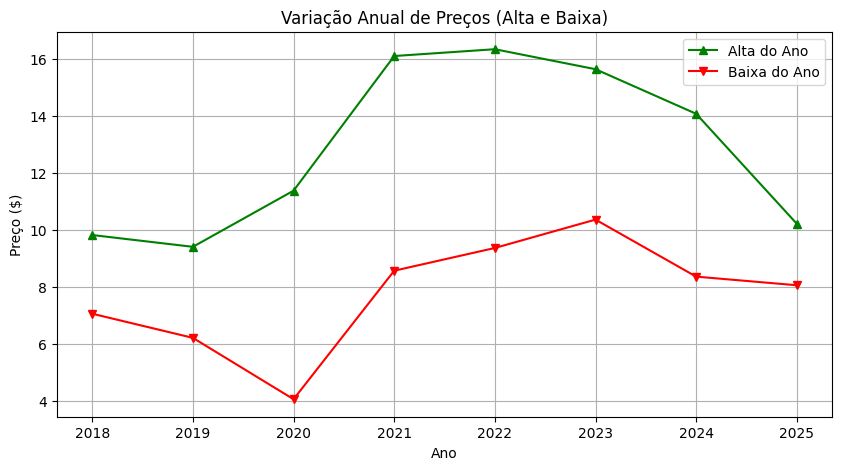

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(annual.index.year, annual['High'], label='Alta do Ano', color='green', marker='^')
plt.plot(annual.index.year, annual['Low'], label='Baixa do Ano', color='red', marker='v')
plt.title('Variação Anual de Preços (Alta e Baixa)')
plt.xlabel('Ano')
plt.ylabel('Preço ($)')
plt.legend()
plt.grid(True)
plt.show()
